In [2]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [96]:
df = pd.read_csv("../csv/active_seller_poll_data.csv")

df = df.freeform_response.dropna()
array = []
for i in df.values:
    array += i.split(' ')
    
text = ' '.join(array)



In [97]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [98]:
stopwords = set(STOPWORDS)
stopwords.update(["website", "found", "site", "much", "looking", "trying"])
mask = np.array(Image.open(r"../assets/bonz_b.png"))
image_colors = ImageColorGenerator(mask)


In [107]:
wordcloud = WordCloud(stopwords=stopwords, background_color=None,mode="RGBA", max_words=300, mask=mask).generate(text)

ValueError: unknown color specifier: 'none'

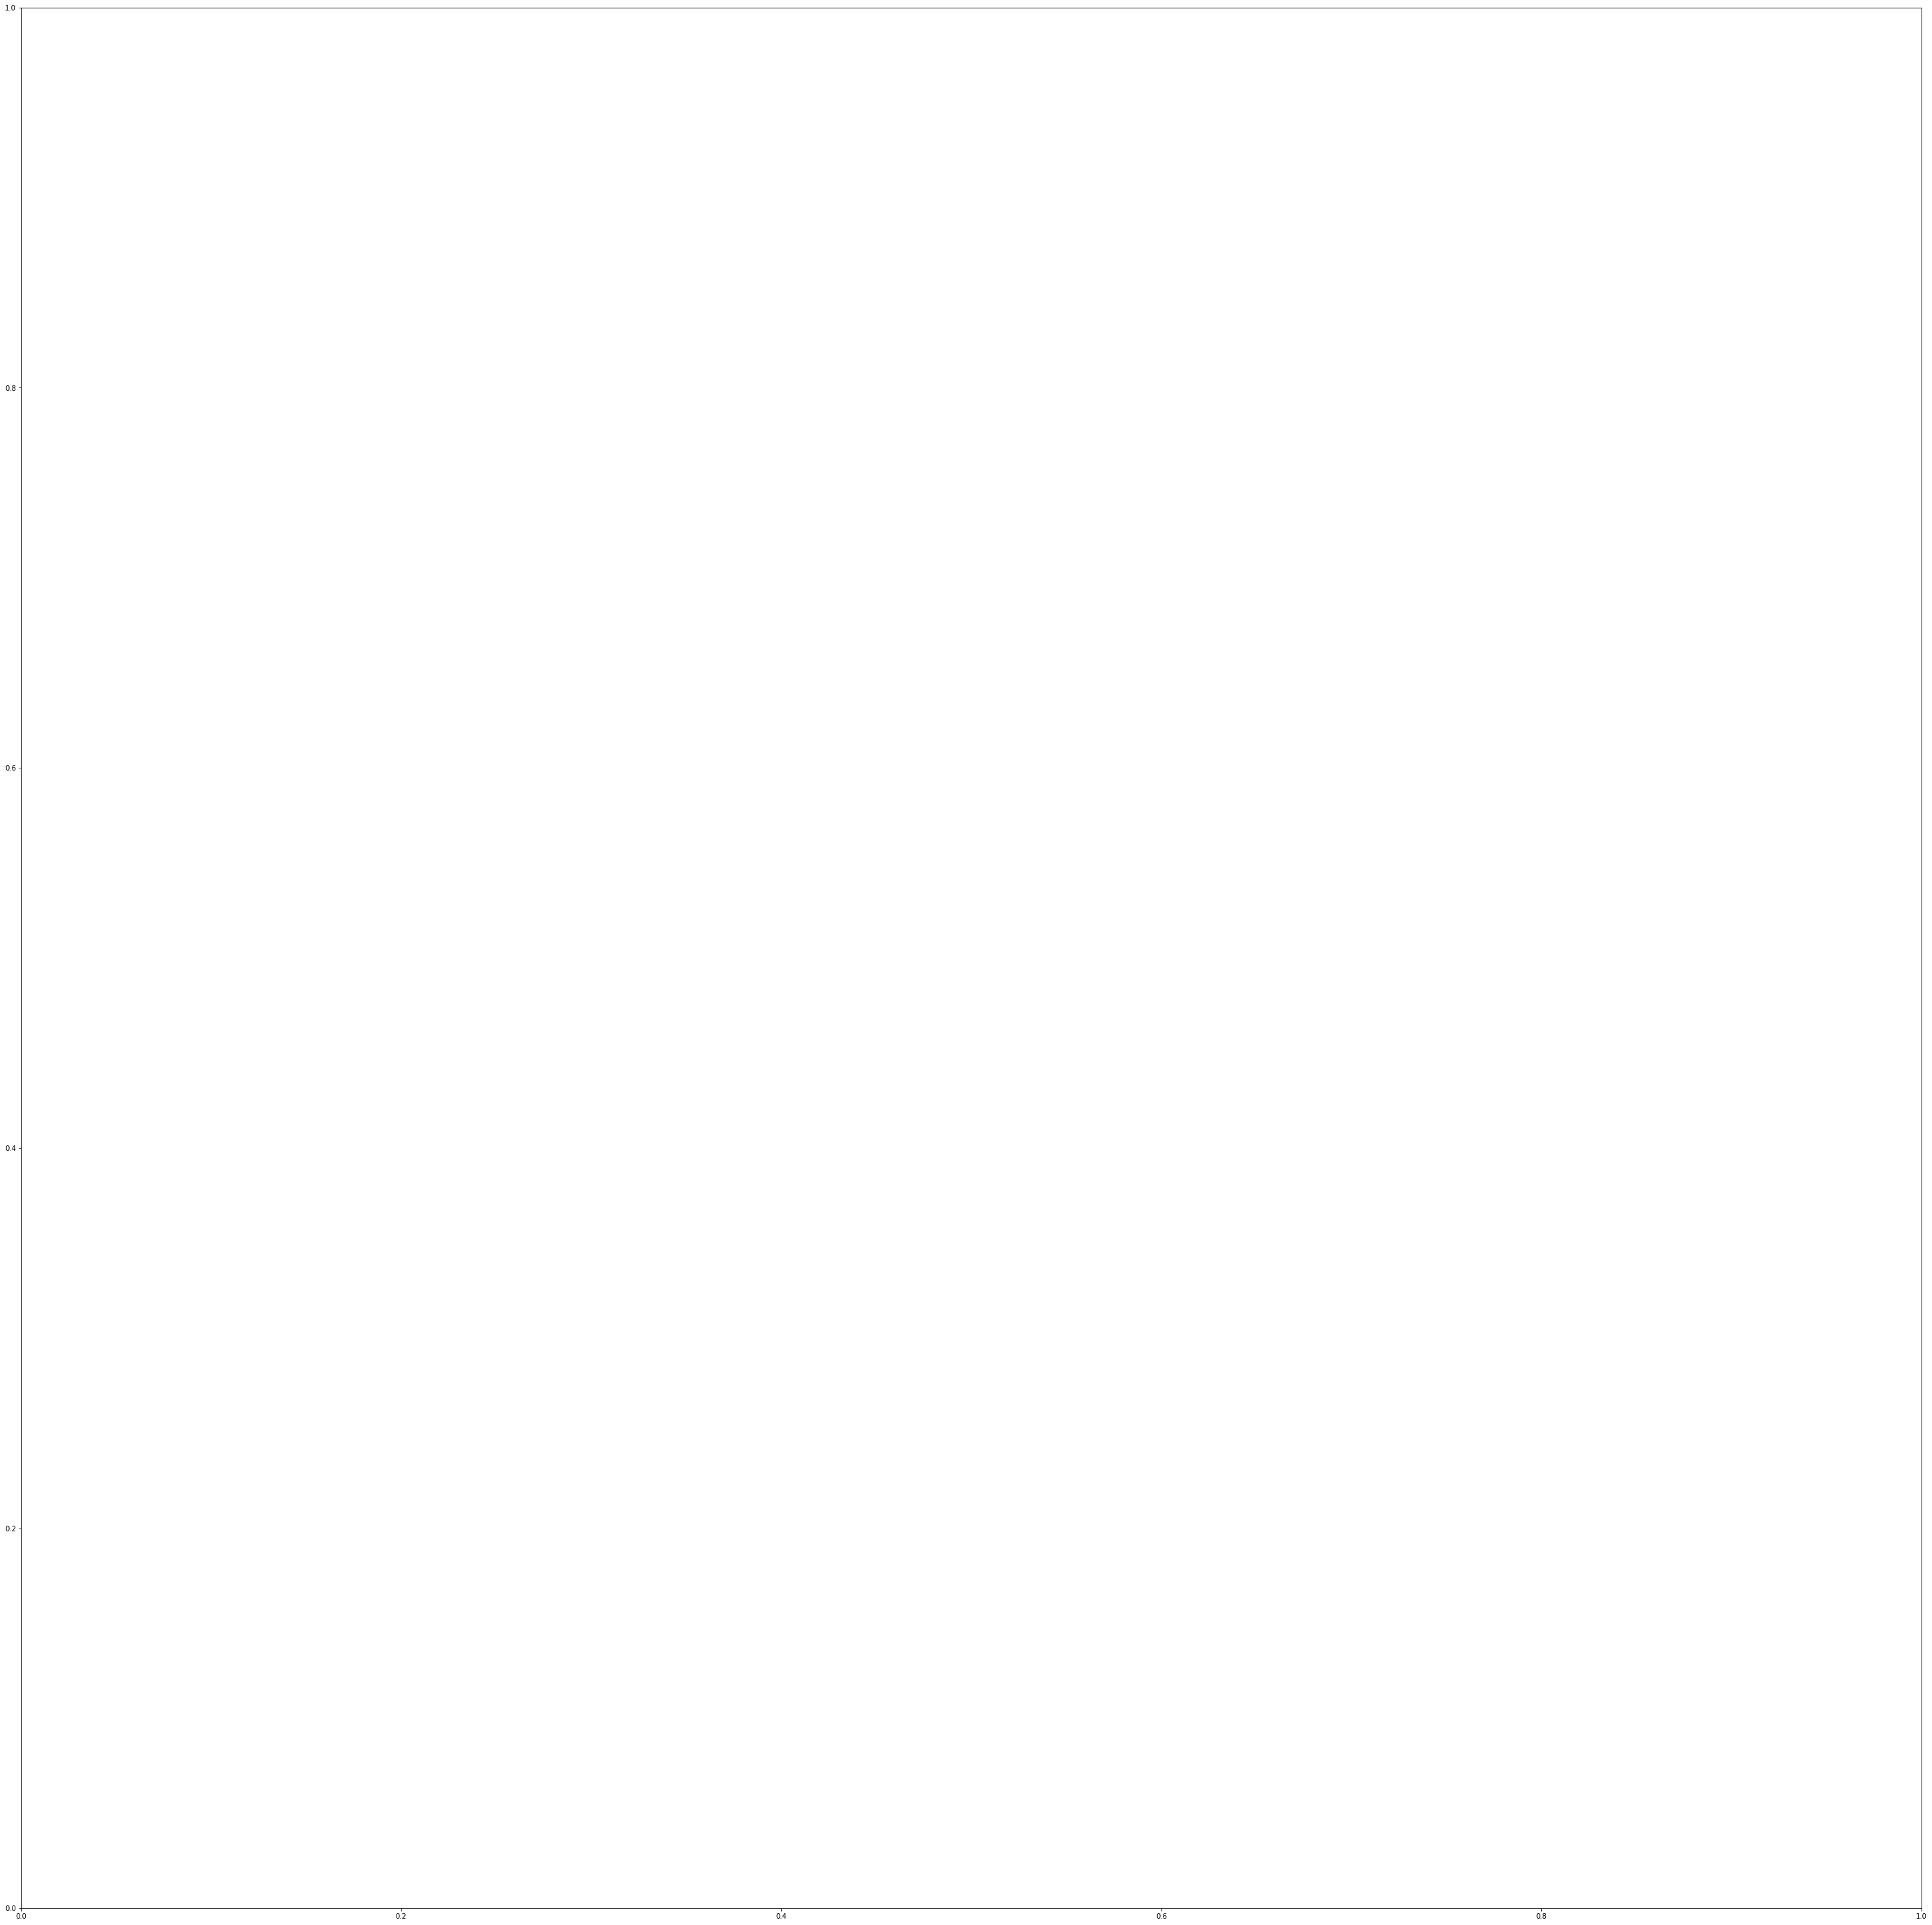

In [108]:
plt.figure(figsize=(50,50))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.savefig("../assets/bonz_word_cloud.png", format="png")
plt.show()

In [31]:
df1 = pd.read_csv('../csv/active_sellers_apr_19.csv')
df1['created_at'] = pd.to_datetime(df1.created_at,infer_datetime_format=True)
df1['is_winning'] = df1['is_winning'].astype(bool)
df1['profit_estimate'] = df1['profit_estimate'].astype(float)
df1['top_category_name'] = df1['top_category_name'].astype(str)
df1['second_category_name'] = df1['second_category_name'].astype(str)
df1['third_category_name'] = df1['third_category_name'].astype(str)
df1['featured_category_id'] = df1['featured_category_id'].astype(str)
df1 = df1.drop(columns=['id_y', 'user_id'])
df1.to_csv('../csv/active_sellers_apr_19.csv')




In [102]:
df1 = pd.read_csv('../csv/active_sellers_apr_19.csv')
df2 = df1[df1.featured_category_id == 'Parts & Accessories']
number_of_items = 10000

def with_without(df,n):
    return df[df.item_count > number_of_items].offers.count()/df[df.item_count > number_of_items].seller_id.count()

print(with_without(df2,number_of_items))

0.8076923076923077


In [109]:
ten = df2[df2.item_count <= 10].seller_id.count()
hundred = df2[[10 <] df2.item_count <= 100 ].seller_id.count()


print(ten, hundred)
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [144]:
import plotly.io as pio
import plotly.plotly as py
import plotly.graph_objs as go

layout = go.Layout(
    title='Figure Title',
    font = dict(size= 14, family='Roboto', color='white'),
    paper_bgcolor='rgba(0,0,0,0)',
	plot_bgcolor='rgba(0,0,0,0)',
    xaxis=dict(
        autorange=True,
        showgrid=False,
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
    )
)


fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['no_background'] = templated_fig.layout.template
list(pio.templates)

['ggplot2',
 'seaborn',
 'plotly',
 'plotly_white',
 'plotly_dark',
 'presentation',
 'xgridoff',
 'no_background']

In [ ]:
layout={'title': 'Figure Title',
        'font': {'size': 14, 'family': 'Roboto', 'color':'white'},
        'paper_bgcolor' : 'rgba(0,0,0,0)',
		'plot_bgcolor' : 'rgba(0,0,0,0)',
        'showlegend':False,
        'xaxis': dict(
            'autorange':True,
            'showgrid':False,
            'zeroline':False,
            'showline':False,
            'ticks':'',
            'showticklabels':False
        ),
        'yaxis': dict(
            'autorange':True,
            'showgrid':False,
            'zeroline':False,
            'showline':False,
            'ticks':'',
            'showticklabels':False
        )}